## Basic setup

In [54]:
%run env_setup.py
%matplotlib inline
from __future__ import division,print_function
from importlib import reload
import numpy as np
import os
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import lessdeep.utils.display as dis

## Download and setup

**you can change the data and the batch size to fit the model to other datasets**

In [8]:
# Download
from lessdeep.datasets.kaggle import dog_cat
from lessdeep.datasets.kaggle import downloader

datapath = dog_cat.download_data()

Enter your user name:········
Enter your Password:········
D:\dev\learn\learning_notes\_data\kaggle\dog_cat\_cache\train.zip already downloaded !
D:\dev\learn\learning_notes\_data\kaggle\dog_cat\_cache\test1.zip already downloaded !


In [51]:
## setup working data path
path = datapath
sample_path = os.path.join(path, 'sample')

In [10]:
## As large as you can, but no larger than 64 is recommanded
batch_size = 64

## Create model

In [66]:
# Generate vgg model
import lessdeep.model.vgg16
reload(lessdeep.model.vgg16)
from lessdeep.model.vgg16 import Vgg16

vgg = Vgg16()

## Load data(Batches)
- accept data path contain at least two folder
    - train
    - valid
- each subfolder contain images in each folder with the class name

In [15]:
# depends on the variable datapath
batches = vgg.get_batches(os.path.join(datapath, 'train'), batch_size=batch_size)
val_batches = vgg.get_batches(os.path.join(datapath, 'valid'), batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Finetune

In [67]:
vgg.finetune(batches)

## Test on sample

In [61]:
smp_batches = vgg.get_batches(os.path.join(sample_path, 'train'), batch_size=batch_size)
smp_val_batches = vgg.get_batches(os.path.join(sample_path, 'valid'), batch_size=batch_size)
smp_imgs, smp_labels = smp_val_batches.next()

Found 20 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


Epoch 1/1
1/1 [==============================] - 58s - loss: 1.6411 - acc: 0.5500 - val_loss: 0.8209 - val_acc: 0.5000


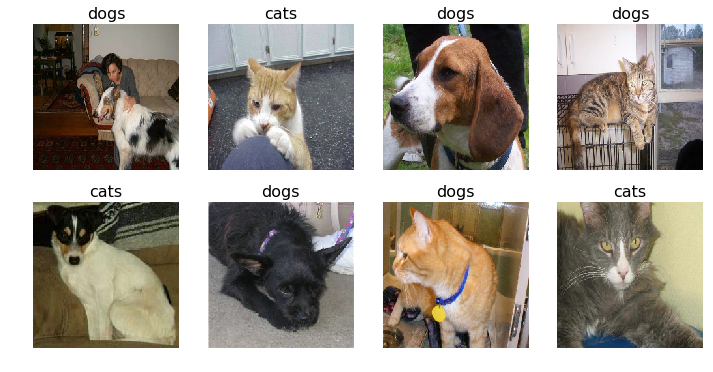

In [68]:
sample_num = 8
sample_epochs = 1

vgg.fit(smp_batches, smp_val_batches, epochs=sample_epochs)

preds, idxs, classes = vgg.predict(smp_imgs[:samle_num])
dis.imshow(Vgg16.img_cvt(smp_imgs[:sample_num]), titles=classes[:sample_num], rows=2)

## Start train

In [ ]:
epochs = 1
vgg.fit(batches, val_batches, epochs=epochs)

In [75]:
probs, preds, classes = vgg.predict(val_batches)

TypeError: Error when checking model : data should be a Numpy array, or list/dict of Numpy arrays. Found: <keras.preprocessing.image.DirectoryIterator object at 0x000001F731F28390>...

## Bad result

In [76]:
bad = np.where(preds != smp_labels[:samle_num, 1])[0]
bad_select = np.random.choice(bad, 8, replace=False)
dis.imshow(smp_imgs[bad_select], titles=probs[bad_select])

NameError: name 'probs' is not defined

## Good result

# Submit reuslt

In [69]:
from IPython.display import FileLink
FileLink('data/redux/subm98.csv')

D:\dev\learn\learning_notes\lessdeep\note_tpl\data\redux\subm98.csv